In [1]:
from Helpers import *
from FLController import *
from ILQGController import *
from LQGController import *

In [39]:
def ComparisonLinearNonlinear(X0= [42,90],XN=[90,0]):
    start = ToCartesian(np.array(X0)/180*pi)
    end = ToCartesian(np.array(XN)/180*pi)
    fig,ax = plt.subplots(3,3,figsize = (15,11))
    timing = .4
    Num_traces = 12
    COLORS = get_colors_from_colormap(Num_traces,cmap_name ="cool" )
    cmap = ListedColormap(COLORS)  # Create a colormap from the array of colors
    norm = Normalize(vmin=0, vmax=Num_traces-1)  # Normalize values to match the range of indices

    cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # ScalarMappable needs a dummy array
    cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, Num_traces-1, 5))  # Add colorbar
    cbar.set_label('Movement Duration')  # Label the colorbar
    cbar.ax.set_yticklabels(['300 ms', '', '', '', '1.5 sec'])  # Custom tick labels


    for i in range(Num_traces):
        X,Y,_,zilqg = ILQG(timing+i/10,1e4,1e1,1e-5,end,K=60,start = start,Delay = 0,Noise=False,plot = False)
        ax[0,0].plot(X,Y,color = COLORS[i])
        ax[1,0].plot(np.linspace(0,1,len(zilqg[:,1])),zilqg[:,2]/np.max(np.abs(zilqg[:,2])),color = COLORS[i])
        ax[2,0].plot(np.linspace(0,1,len(zilqg[:,1])),zilqg[:,3]/np.max(np.abs(zilqg[:,3])),color = COLORS[i])
        X,Y,_,zilqg = LQG(timing+i/10,1e4,1e4,1e1,1e1,1e-5,1e-5,end,Num_iter=300,starting_point = start,Delay = 0,plot = False)
        ax[0,1].plot(X,Y,color = COLORS[i])
        ax[1,1].plot(np.linspace(0,1,len(zilqg[1])),zilqg[1]/np.max(np.abs(zilqg[1])),color = COLORS[i])
        ax[2,1].plot(np.linspace(0,1,len(zilqg[1])),zilqg[4]/np.max(np.abs(zilqg[4])),color = COLORS[i])
        X,Y,_,zilqg = BestLQG(timing+i/10,1e4,1e4,1e1,1e1,1e-5,1e-5,end,Num_iter=300,starting_point = start,Delay = 0,plot = False)
        ax[0,2].plot(X,Y,color = COLORS[i])
        ax[1,2].plot(np.linspace(0,1,len(zilqg[1])),zilqg[1]/np.max(np.abs(zilqg[1])),color = COLORS[i])
        ax[2,2].plot(np.linspace(0,1,len(zilqg[1])),zilqg[4]/np.max(np.abs(zilqg[4])),color = COLORS[i])
    for e in range(3):
        ax[0,e].set_aspect("equal")
        ax[0,e].axis("off")
        #ax[0,e].set_ylim(start[1]-25,end[1]+25)
        #ax[0,e].set_ylim(20,60)
        ax[0,e].scatter([end[0]],[end[1]],color = "black",s=100)
        #ax[0,e].plot(np.linspace(10,15,100),np.ones(100)*60,color = "black")
        #ax[0,e].plot(np.ones(100)*10,np.linspace(60,65,100),color = "black")
        #ax[0,e].text(11.5,60.4,"5 cm",fontsize= 12)
        #ax[0,e].text(8,62,"5 cm",fontsize= 12,rotation = 90)
        for l in range(1,3):
            ax[l,e].plot(np.linspace(0,1,100),np.zeros(100),color = "grey",linestyle = "-.")
            ax[l,e].spines['top'].set_visible(False)
            ax[l,e].spines['right'].set_visible(False)
            ax[l,e].set_xlabel("Time (Normalized)")
        ax[1,e].set_ylabel("Shoulder Angular Velocity (Normalized)")
        ax[2,e].set_ylabel("Elbow Angular Velocity (Normalized)")
    ax[0,0].set_title("ILQG Prediction",fontsize = 20)
    ax[0,1].set_title("LQG Prediction \nwith linear system",fontsize = 20)
    ax[0,2].set_title("LQG Prediction \nwith nonlinear system",fontsize = 20)

def ComparisonLinearNonlinear2(X0= [42,90],XN=[90,0]):
    start = ToCartesian(np.array(X0)/180*pi)
    end = ToCartesian(np.array(XN)/180*pi)
    fig,ax = plt.subplots(2,3,figsize = (15,11))
    timing = .4
    Num_traces = 12
    COLORS = get_colors_from_colormap(Num_traces,cmap_name ="cool" )
    cmap = ListedColormap(COLORS)  # Create a colormap from the array of colors
    norm = Normalize(vmin=0, vmax=Num_traces-1)  # Normalize values to match the range of indices

    cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # ScalarMappable needs a dummy array
    cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, Num_traces-1, 5))  # Add colorbar
    cbar.set_label('Movement Duration')  # Label the colorbar
    cbar.ax.set_yticklabels(['300 ms', '', '', '', '1.5 sec'])  # Custom tick labels


    for i in range(Num_traces):
        X,Y,_,zilqg = ILQG(timing+i/10,1e4,1e1,1e-5,end,K=60,start = start,Delay = 0,Noise=False,plot = False)
        ax[0,0].plot(X,Y,color = COLORS[i])
        Vx=((X[1:]-X[:-1])/((timing+i/10)/60))
        Vy=((Y[1:]-Y[:-1])/((timing+i/10)/60))
        V = np.sqrt(Vx**2+Vy**2)
        ax[1,0].plot(np.linspace(0,1,len(X)-1),V/np.max(np.abs(V)),color = COLORS[i])
        X,Y,_,zilqg = LQG(timing+i/10,1e4,1e4,1e1,1e1,1e-5,1e-5,end,Num_iter=300,starting_point = start,Delay = 0,plot = False)
        ax[0,1].plot(X,Y,color = COLORS[i])
        Vx=((X[1:]-X[:-1])/((timing+i/10)/60))
        Vy=((Y[1:]-Y[:-1])/((timing+i/10)/60))
        V = np.sqrt(Vx**2+Vy**2)
        ax[1,1].plot(np.linspace(0,1,len(X)-1),V/np.max(np.abs(V)),color = COLORS[i])
        X,Y,_,zilqg = BestLQG(timing+i/10,1e4,1e4,1e1,1e1,1e-5,1e-5,end,Num_iter=300,starting_point = start,Delay = 0,plot = False)
        ax[0,2].plot(X,Y,color = COLORS[i])
        Vx=((X[1:]-X[:-1])/((timing+i/10)/60))
        Vy=((Y[1:]-Y[:-1])/((timing+i/10)/60))
        V = np.sqrt(Vx**2+Vy**2)
        ax[1,2].plot(np.linspace(0,1,len(X)-1),V/np.max(np.abs(V)),color = COLORS[i])
    for e in range(3):
        ax[0,e].set_aspect("equal")
        ax[0,e].axis("off")
        #ax[0,e].set_ylim(start[1]-25,end[1]+25)
        #ax[0,e].set_ylim(20,60)
        ax[0,e].scatter([end[0]],[end[1]],color = "black",s=100)
        #ax[0,e].plot(np.linspace(10,15,100),np.ones(100)*60,color = "black")
        #ax[0,e].plot(np.ones(100)*10,np.linspace(60,65,100),color = "black")
        #ax[0,e].text(11.5,60.4,"5 cm",fontsize= 12)
        #ax[0,e].text(8,62,"5 cm",fontsize= 12,rotation = 90)
        for l in range(1,2):
            ax[l,e].plot(np.linspace(0,1,100),np.zeros(100),color = "grey",linestyle = "-.")
            ax[l,e].spines['top'].set_visible(False)
            ax[l,e].spines['right'].set_visible(False)
            ax[l,e].set_xlabel("Time (Normalized)")
        ax[1,e].set_ylabel("Velocity (Normalized)")
    ax[0,0].set_title("ILQG Prediction",fontsize = 20)
    ax[0,1].set_title("LQG Prediction \nwith linear system",fontsize = 20)
    ax[0,2].set_title("LQG Prediction \nwith nonlinear system",fontsize = 20)

def trajectory_comparison(S,T):
    S,T = np.array(S),np.array(T) 
    fig,ax = plt.subplots(figsize = (12,11))
    for i in range(S.shape[0]):
        start = ToCartesian(np.array(S[i])/180*pi)
        end = ToCartesian(np.array(T[i])/180*pi)
        
        timing = .4
        Num_traces = 12
        COLORS = get_colors_from_colormap(Num_traces,cmap_name ="cool" )
        cmap = ListedColormap(COLORS)  # Create a colormap from the array of colors
        norm = Normalize(vmin=0, vmax=Num_traces-1)  # Normalize values to match the range of indices


        # Add a colorbar to represent fast to slow movements
        cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # ScalarMappable needs a dummy array
        cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, Num_traces-1, 5))  # Add colorbar
        cbar.set_label('Movement Duration')  # Label the colorbar
        cbar.ax.set_yticklabels(['300 ms', '', '', '', '1.5 sec'])  # Custom tick labels


        for i in range(Num_traces):
            X,Y,_,zilqg = ILQG(timing+i/10,1e4,1e1,1e-5,end,K=60,start = start,Delay = 0.06,Noise=True,plot = False)
            ax.plot(X,Y,color = COLORS[i])
        ax.set_aspect("equal")
        ax.axis("off")
            #ax[0,e].set_ylim(start[1]-25,end[1]+25)
            #ax[0,e].set_ylim(20,60)
        ax.scatter([end[0]],[end[1]],color = "black",s=100)
        ax.set_title("ILQG Prediction",fontsize = 20)
    # Add a colorbar to represent fast to slow movements


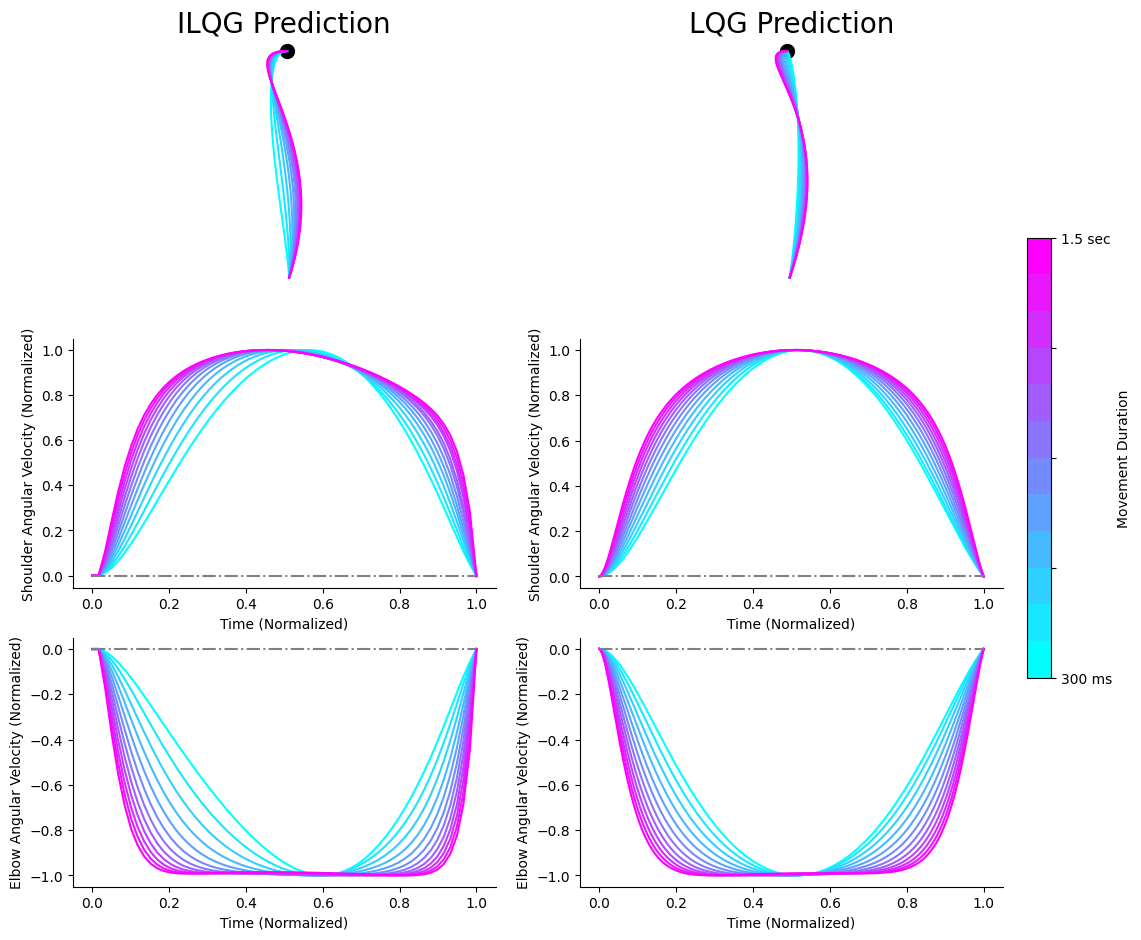

In [3]:
ComparisonLinearNonlinear(X0= [42,90],XN=[90,0])

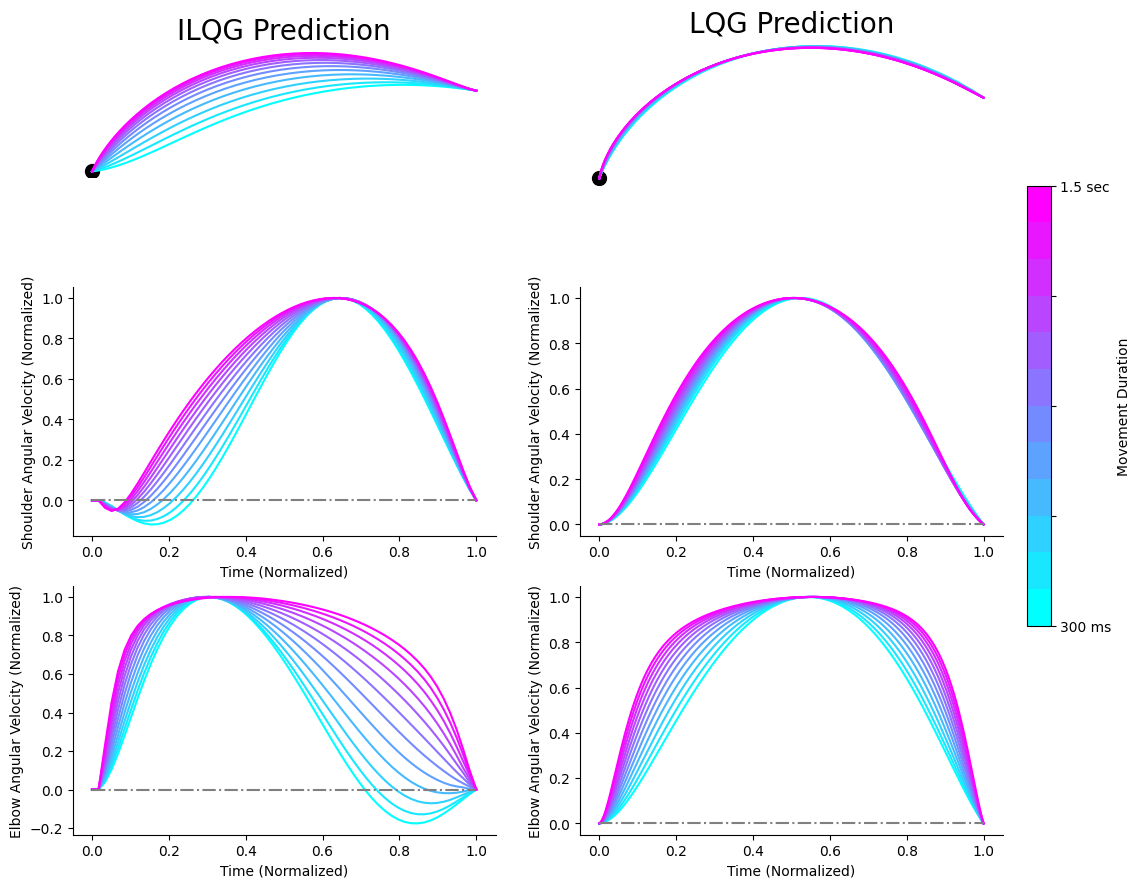

In [4]:
ComparisonLinearNonlinear(X0= [20,50],XN=[70,110])

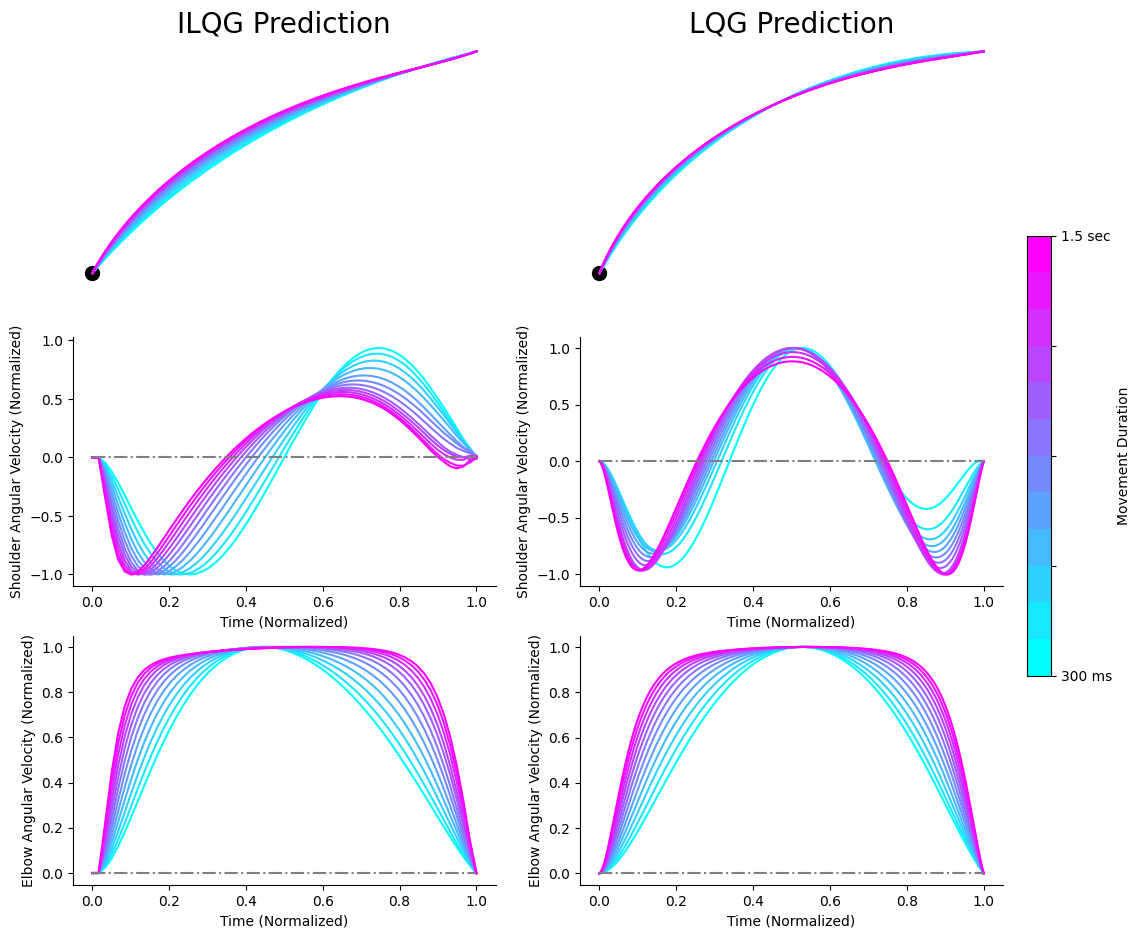

In [5]:
ComparisonLinearNonlinear(X0= [30,60],XN=[30,120])

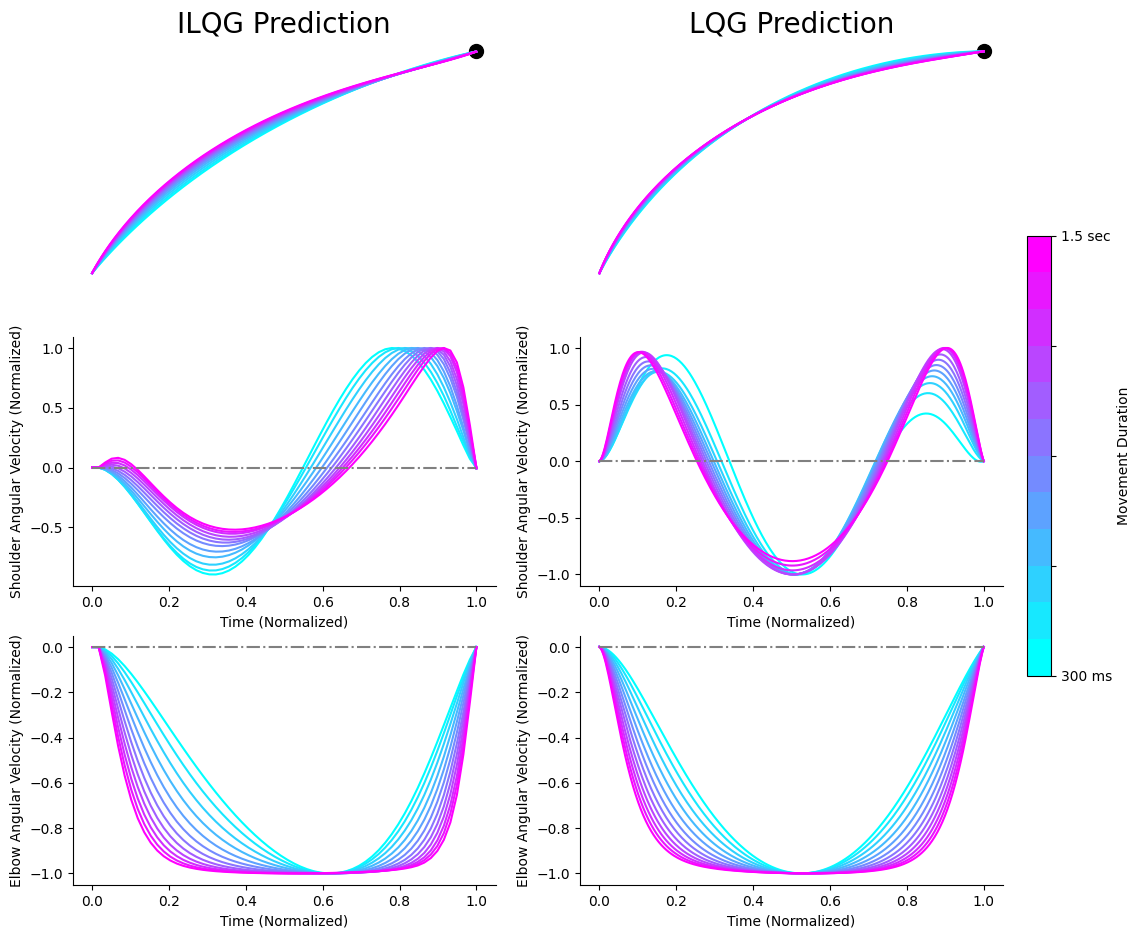

In [6]:
ComparisonLinearNonlinear(X0= [30,120],XN=[30,60])

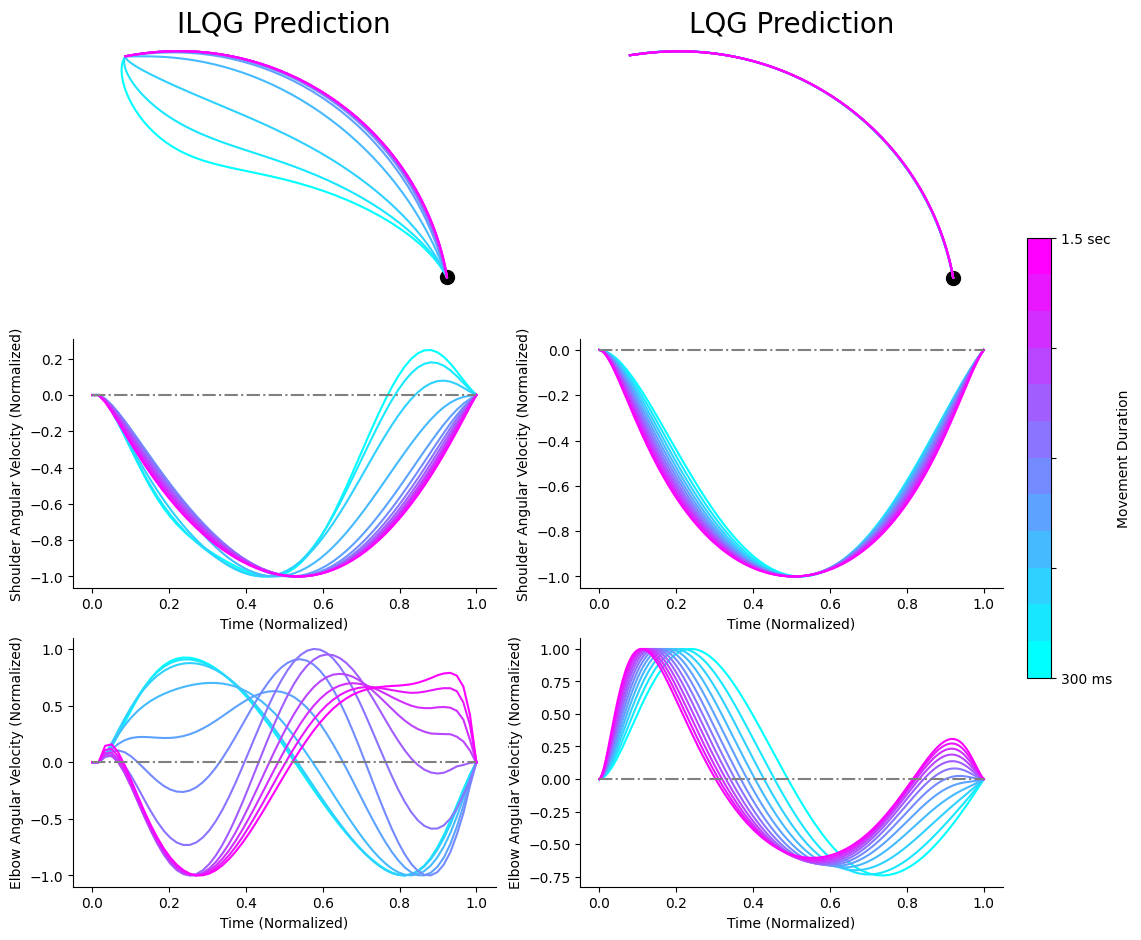

In [7]:
ComparisonLinearNonlinear(X0= [90,20],XN=[00,20])

## FLASH AND HOGAN

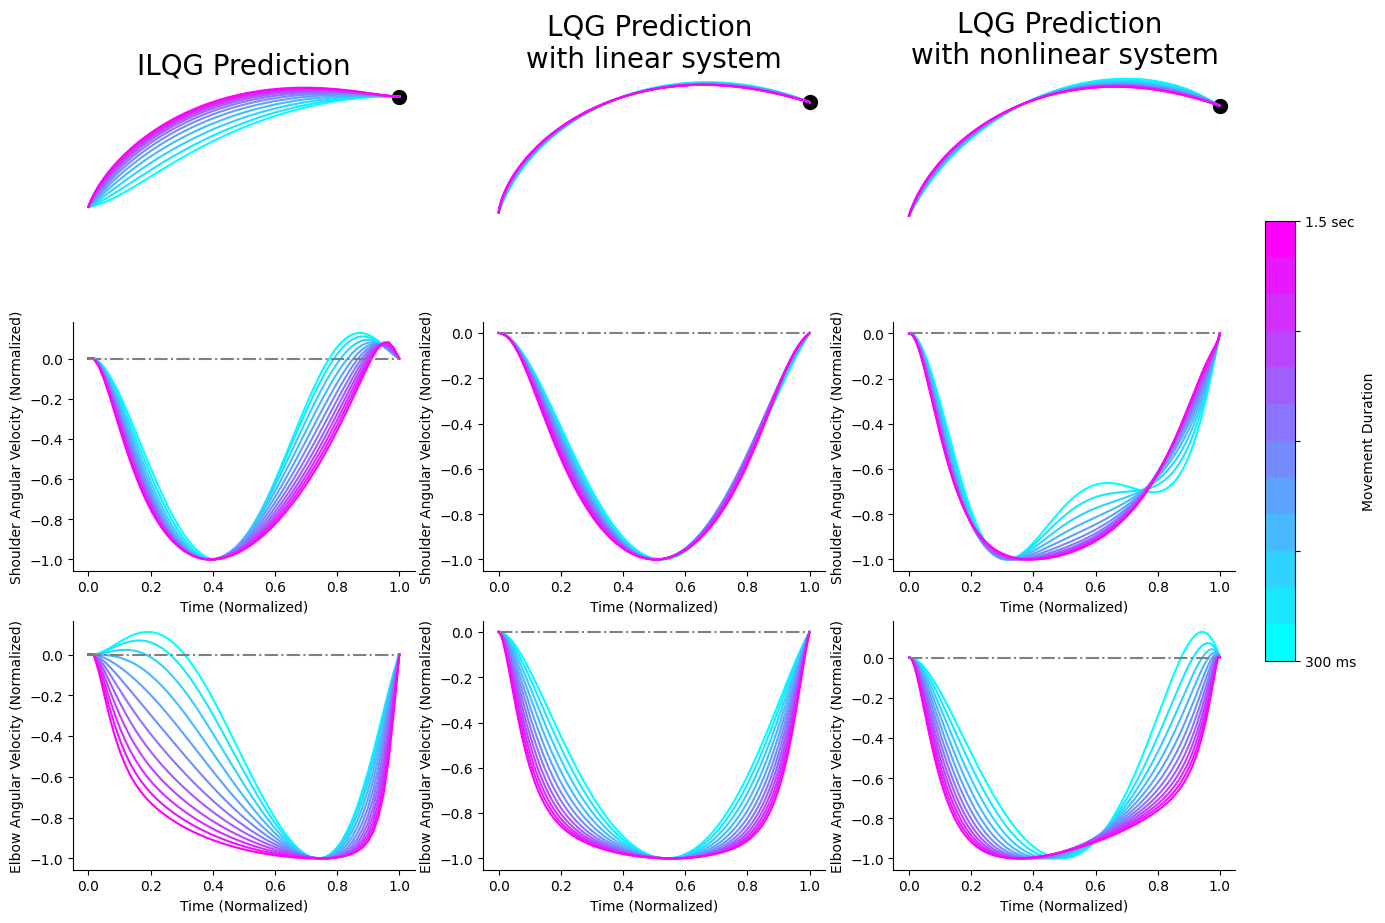

In [53]:
ComparisonLinearNonlinear(X0= [70,110],XN=[30,50])

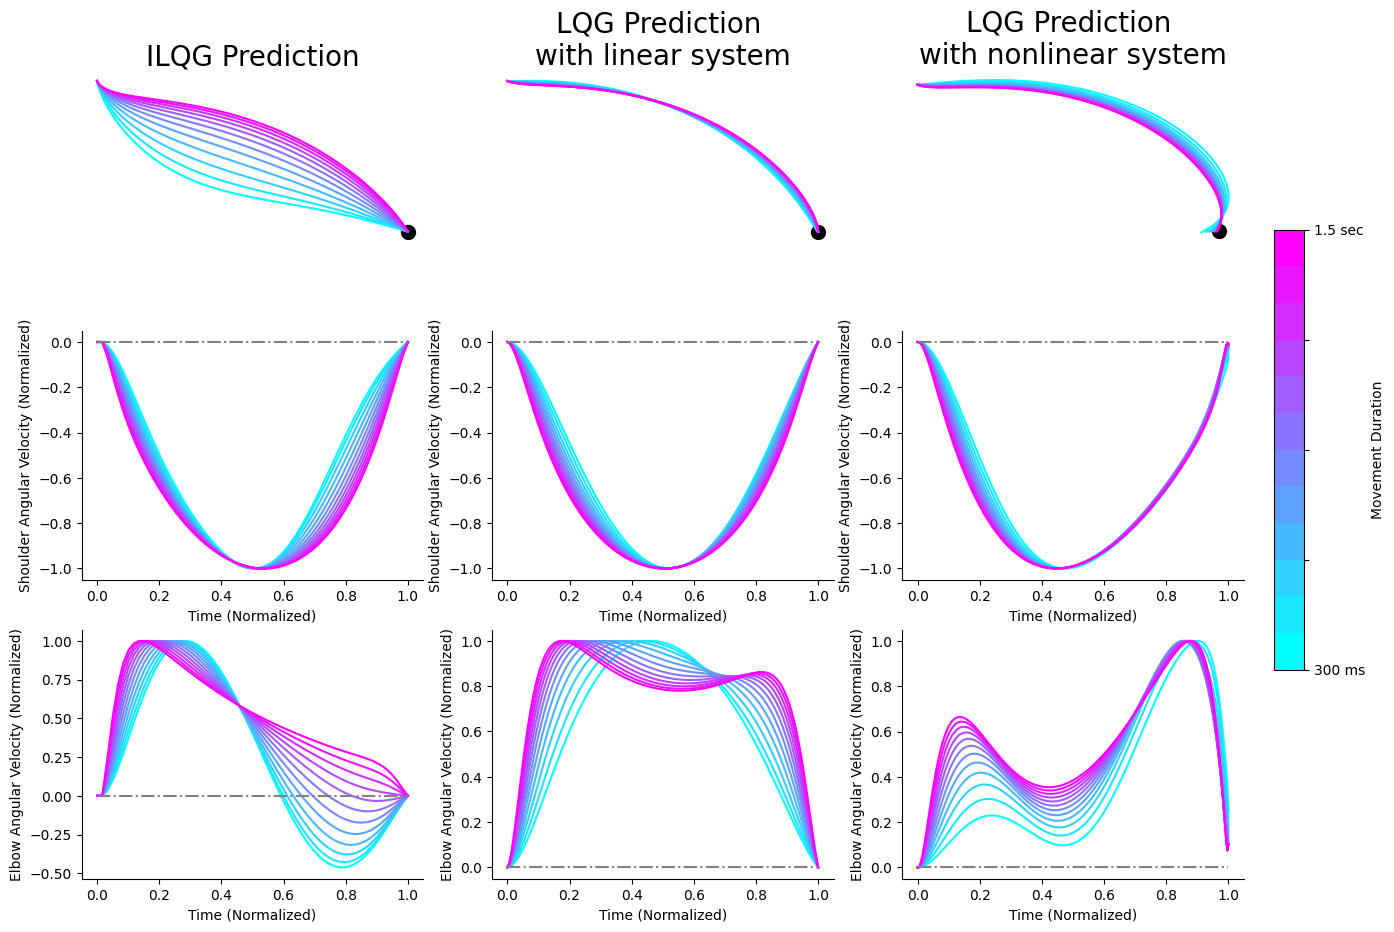

In [17]:
ComparisonLinearNonlinear(X0= [70,70],XN=[-10,100])

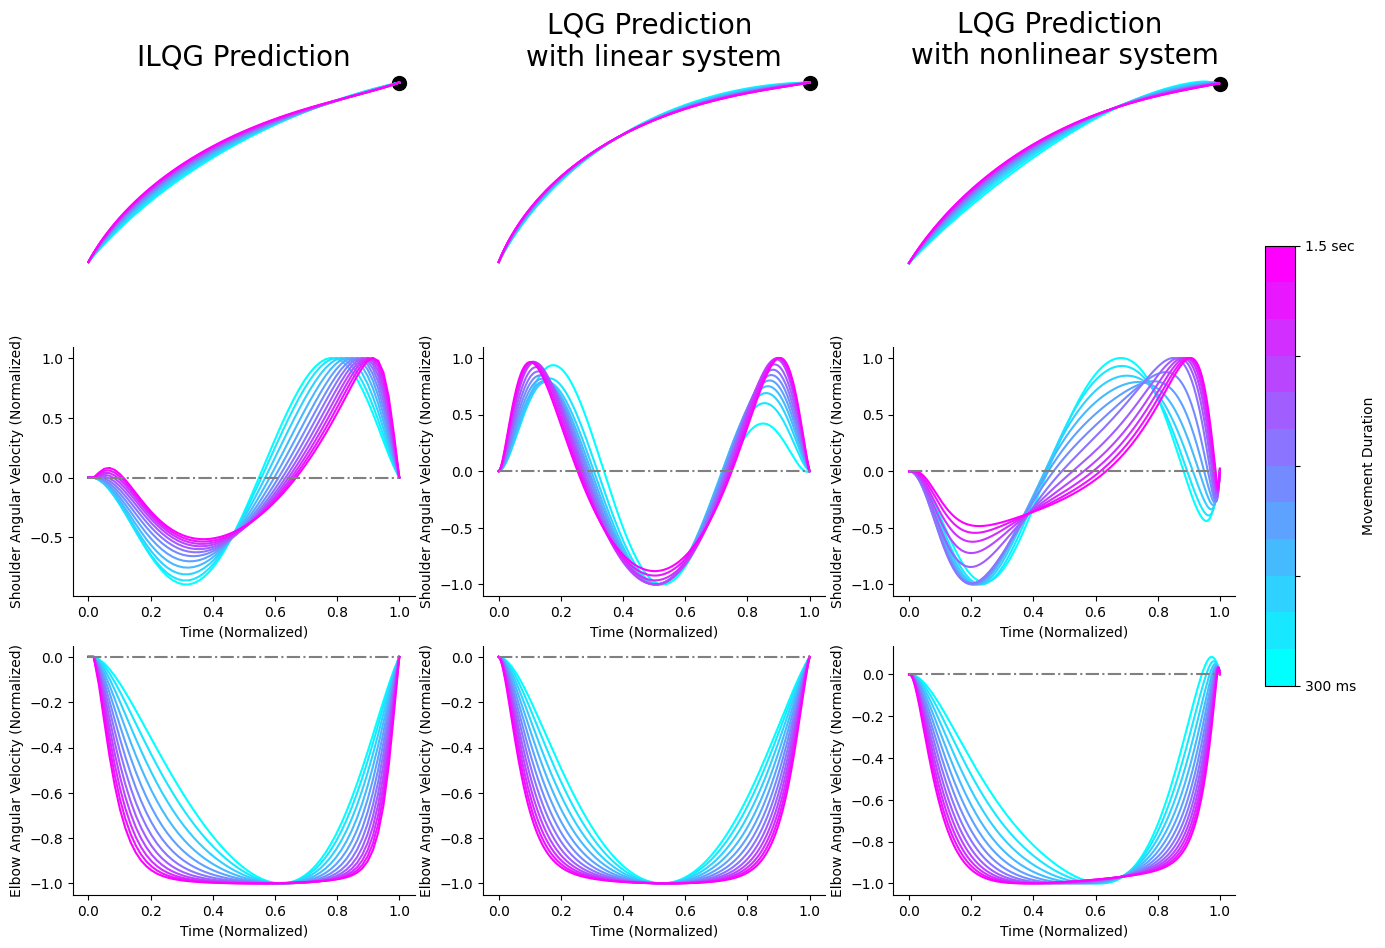

In [18]:
ComparisonLinearNonlinear(X0= [30,120],XN=[30,60])

# https://pmc.ncbi.nlm.nih.gov/articles/PMC2607068/

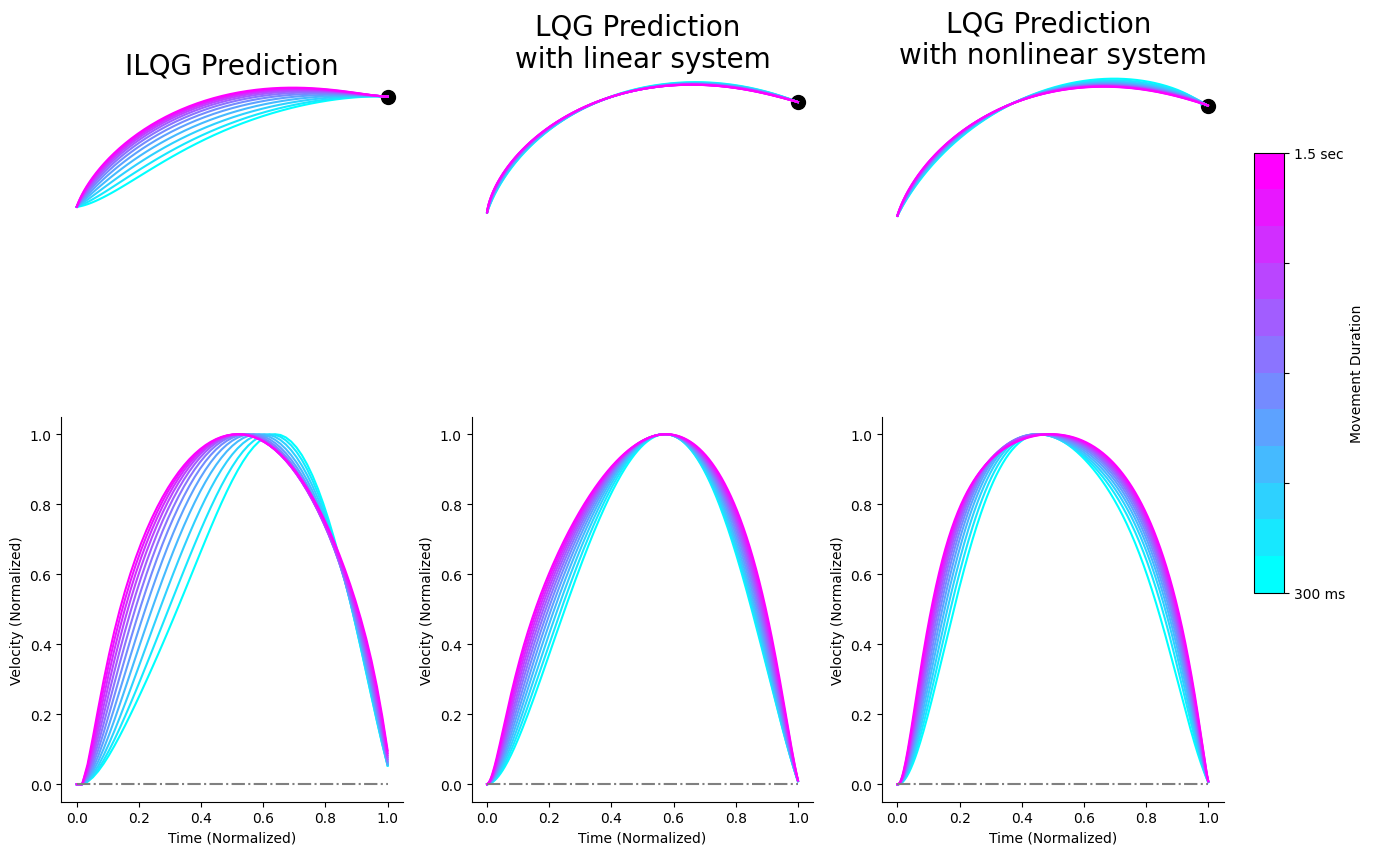

In [48]:
ComparisonLinearNonlinear2(X0= [70,110],XN=[30,50])

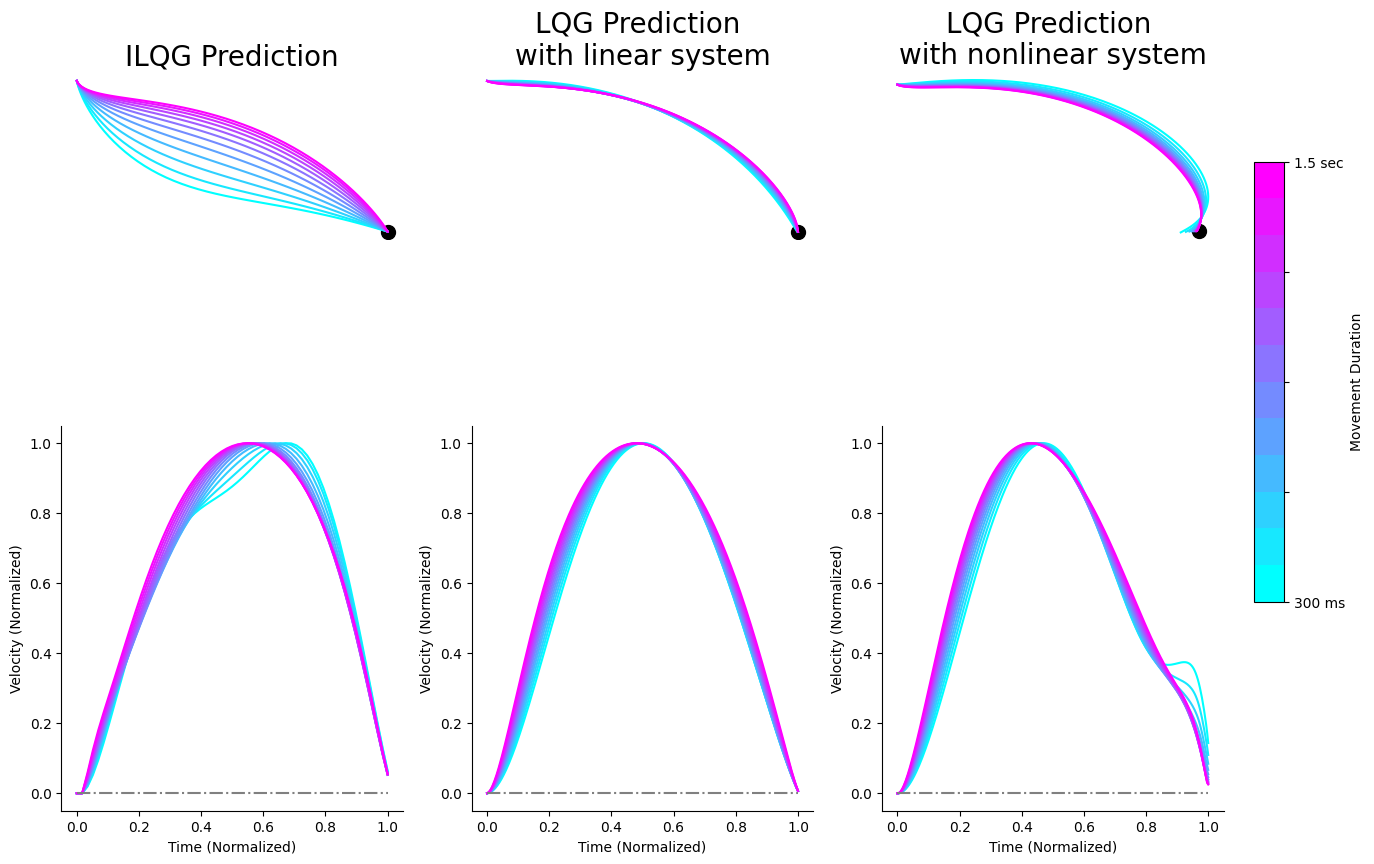

In [49]:
ComparisonLinearNonlinear2(X0= [70,70],XN=[-10,100])

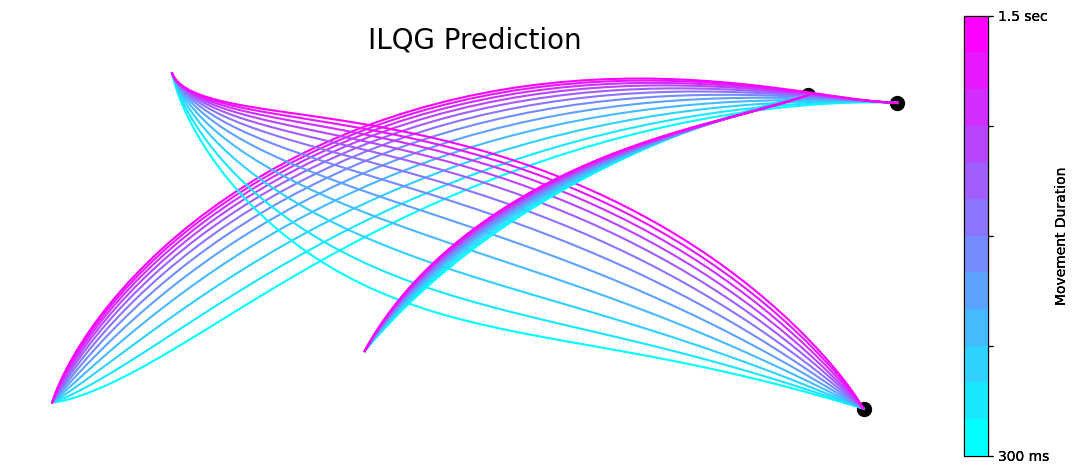

In [52]:
trajectory_comparison([[70,110],[70,70],[30,120]],[[30,50],[-10,100],[30,60]])